In [105]:
import pandas as pd
import numpy as np
df = pd.read_csv('ratings_small.csv')
df.head(2)

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179


In [106]:
df = df.drop('timestamp', axis=1)
df.head(2)

,userId,movieId,rating
0,1,31,2.5
1,1,1029,3.0


In [107]:
# ## choose a random lines from the dataframe

# samp_ = df.sample(5)
# users = samp_['userId'].values
# movies = samp_['movieId'].values
# ratings = samp_['rating'].values

In [108]:
matrix = pd.pivot_table(df, values='rating', index='userId', columns='movieId')


In [109]:
## cria a matriz B
b = matrix.copy()


In [110]:
## substitui um elemento aleatório que não seja NAN da matriz B por um valor aleatorio de 0 a 5.\n",
i = np.random.randint(0, b.shape[0])
j = np.random.randint(0, b.shape[1])
while np.isnan(b.iloc[i, j]):
    i = np.random.randint(0, b.shape[0])
    j = np.random.randint(0, b.shape[1])
print(i, j)
print(b.iloc[i, j])
b.iloc[i, j] = np.random.randint(5, 51)/10
print(b.iloc[i, j])

357 528
3.0
2.4


In [111]:
## substitui os NANs da matriz B por 2.5
b = b.fillna(2.75)

In [112]:
b = b.to_numpy()

In [113]:
def selecionar_K_primeiros_valores (u, s, vt, K):
    """Remove elementos de u, s e vt deixando somente K componentes restantes
    """ 
    u_ = u[:,0:K]
    s_ = s[:K]
    vt_ = vt[:K,:]
    return u_, s_, vt_

In [114]:
from scipy.linalg import svd, diagsvd

## calcula a SVD da matriz B
U, s, Vt = svd(b)


In [115]:
import matplotlib.pyplot as plt


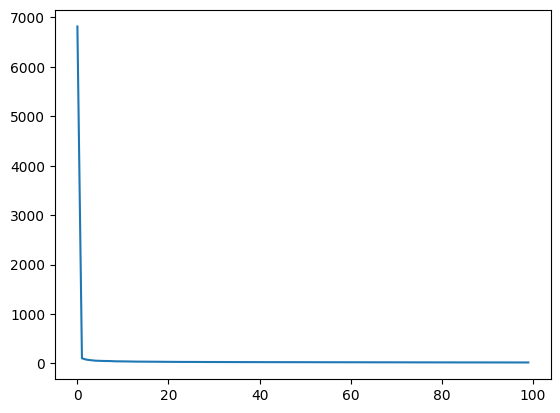

In [116]:
plt.plot(s[:100])
plt.show()

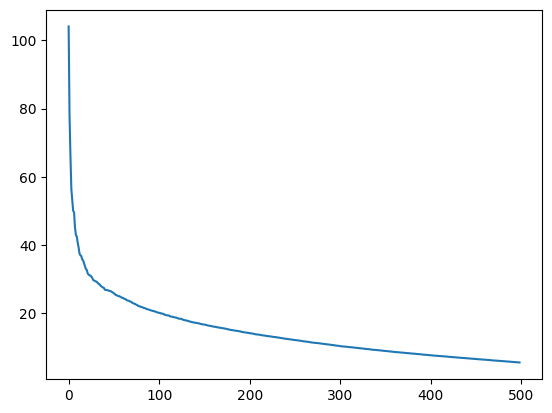

In [120]:
## plot the s values
plt.plot(s[1:500])
plt.show()

In [118]:
#retira os K ultimos valores das matrizes U, s e Vt

U_, s_, Vt_ = selecionar_K_primeiros_valores(U, s, Vt, 25)

In [119]:
## reconstrói a matriz B com a retirada do ruido a partir da SVD
B_ = U_ @ diagsvd(s_, U_.shape[1], Vt_.shape[0]) @ Vt_

# ## compara o valor da matriz original, da matriz B e da matriz B_ (com ruido retirado)
# for i in range(len(ratings)):
#     print(f"valor_original{i} : {ratings[i]}")
#     print(f"valor ruidoso: {i} : {b[users[i], movies[i]]}")
#     print(f"valor apos retirada do ruido{i} : {B_[users[i], movies[i]]}")
#     print(f"diferenca{i}: {b[users[i], movies[i]] - B_[users[i], movies[i]]}")
print(matrix.iloc[i, j])
print(b[i, j])
print(B_[i, j])




3.0
2.4
3.1698862984293767
